In [3]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns

In [4]:
# Create connection.
cnx = sqlite3.connect('/Users/kaushikganguly/Downloads/database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [5]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [7]:
cursor = cnx.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[('sqlite_sequence',), ('Player_Attributes',), ('Player',), ('Match',), ('League',), ('Country',), ('Team',), ('Team_Attributes',)]


In [8]:
df.shape

(183978, 42)

In [9]:
df.keys()

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [10]:
df.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [11]:
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,91989.50000,165671.524291,135900.617324,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,53110.01825,53851.094769,136927.840510,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.00000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45995.25000,155798.000000,34763.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,91989.50000,183488.000000,77741.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,137983.75000,199848.000000,191080.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,183978.00000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


In [12]:
# Null check
df.isnull().sum(axis=0)

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [13]:
df = df.dropna()

# Test for Null after removing
df.isnull().sum(axis=0)

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [18]:
# Overall correlation using pearson
df['overall_rating'] = df['overall_rating'].astype('int')
df.corr(method='pearson',min_periods=1).transpose().sort_values('overall_rating', ascending=False)

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
overall_rating,-0.003738,-0.278703,-0.328315,1.000000,0.765435,0.357320,0.330079,0.313324,0.458243,0.361739,...,0.431493,0.392715,0.132185,0.163986,0.128054,0.027675,0.006717,0.028799,0.008029,0.007804
reactions,-0.005740,-0.233465,-0.312538,0.771856,0.580991,0.384999,0.354769,0.295601,0.460469,0.397448,...,0.452559,0.390045,0.123173,0.159255,0.137098,-0.073940,-0.079753,-0.033067,-0.078091,-0.078300
potential,0.000837,-0.021252,0.010588,0.765435,1.000000,0.277284,0.287838,0.206063,0.382538,0.301678,...,0.379278,0.315207,0.054094,0.082073,0.063284,-0.012283,0.005865,0.092299,0.004472,0.004936
short_passing,-0.006701,-0.065311,-0.090237,0.458243,0.382538,0.790323,0.580245,0.548435,1.000000,0.639995,...,0.766401,0.612511,0.349578,0.415427,0.380148,-0.694111,-0.689874,-0.422659,-0.691030,-0.693260
ball_control,-0.013976,-0.024942,-0.053940,0.443991,0.401803,0.807721,0.720694,0.550956,0.890622,0.749459,...,0.773185,0.684410,0.188479,0.252325,0.220588,-0.741678,-0.732701,-0.465803,-0.735166,-0.738085
long_passing,-0.008137,-0.111272,-0.139584,0.434525,0.343133,0.685649,0.341121,0.362741,0.803073,0.414520,...,0.670151,0.476750,0.441837,0.496679,0.462544,-0.464221,-0.466906,-0.261361,-0.468453,-0.469598
vision,-0.007928,-0.163099,-0.188087,0.431493,0.379278,0.693978,0.652376,0.336472,0.766401,0.690716,...,1.000000,0.665802,0.080042,0.144749,0.118656,-0.502582,-0.461778,-0.201738,-0.465109,-0.470499
shot_power,-0.010371,-0.080175,-0.126514,0.428053,0.325459,0.656740,0.727835,0.541365,0.722320,0.746622,...,0.647262,0.680887,0.094068,0.155941,0.117569,-0.584551,-0.589048,-0.398712,-0.591626,-0.593827
penalties,-0.011751,-0.175255,-0.162481,0.392715,0.315207,0.574208,0.726234,0.431291,0.612511,0.713116,...,0.665802,1.000000,-0.043649,0.005405,-0.030404,-0.470286,-0.435311,-0.189194,-0.439610,-0.443635
long_shots,-0.010382,-0.068652,-0.119638,0.392668,0.313059,0.716515,0.806895,0.406003,0.729741,0.814894,...,0.730112,0.714596,-0.011926,0.054655,0.022683,-0.545446,-0.538702,-0.337826,-0.542884,-0.544979


In [24]:
df['overall_rating'] = df['overall_rating'].astype('int')
display(df.sort_values('overall_rating', ascending=False).head(10)[['overall_rating', 'reactions', 'potential',
'short_passing', 'long_passing','ball_control', 'vision', 'shot_power']])

,overall_rating,reactions,potential,short_passing,long_passing,ball_control,vision,shot_power
102493,94,96.0,97.0,89.0,76.0,96.0,90.0,81.0
102484,94,92.0,95.0,88.0,79.0,96.0,90.0,80.0
102494,94,96.0,97.0,89.0,76.0,96.0,90.0,80.0
102499,94,95.0,96.0,89.0,75.0,97.0,90.0,81.0
102498,94,95.0,96.0,89.0,75.0,97.0,90.0,80.0
102497,94,95.0,96.0,89.0,75.0,96.0,90.0,80.0
102496,94,96.0,97.0,89.0,76.0,96.0,90.0,80.0
102482,94,92.0,94.0,88.0,79.0,96.0,90.0,80.0
102483,94,92.0,94.0,88.0,79.0,96.0,90.0,80.0
102495,94,96.0,97.0,89.0,76.0,96.0,90.0,80.0


In [25]:
feature_columns = ['reactions', 'potential']
X = df[feature_columns]
y = df.overall_rating
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
print(lm.intercept_)

5.987208859887801


In [27]:
print(lm.coef_)

[0.37951806 0.51094056]


In [28]:
from matplotlib.pyplot import figure
import  matplotlib.pyplot as plt

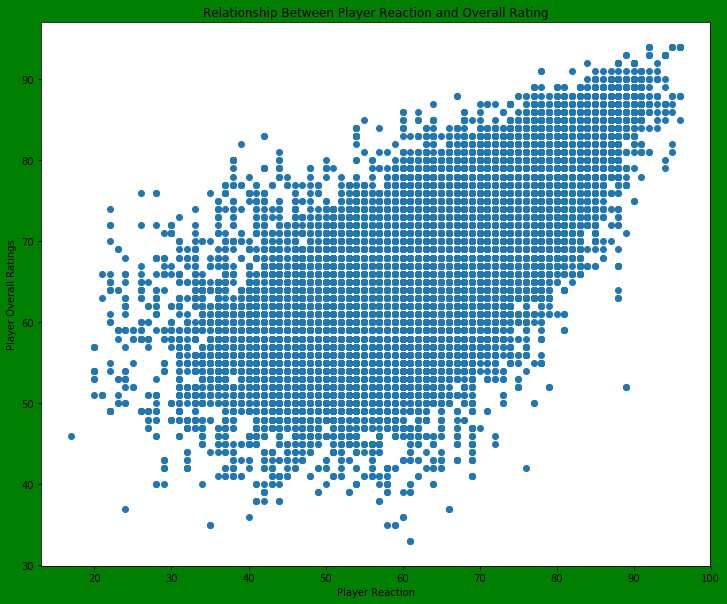

In [29]:
figure(num=None, figsize=(12,10), facecolor='G', edgecolor='G')
plt.scatter(df.reactions, df.overall_rating)
plt.xlabel('Player Reaction')
plt.ylabel('Player Overall Ratings')
plt.title("Relationship Between Player Reaction and Overall Rating")
plt.show()

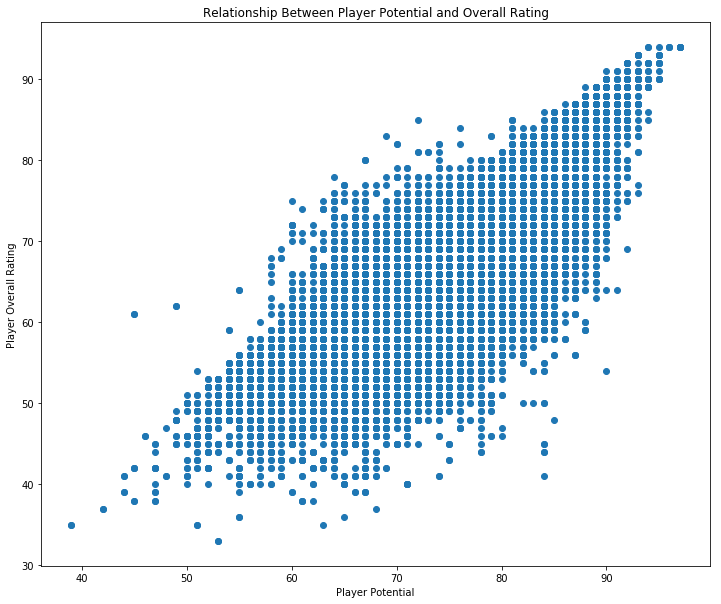

In [30]:
figure(num=None, figsize=(12,10), facecolor='w', edgecolor='B')
plt.scatter(df.potential, df.overall_rating)
plt.xlabel('Player Potential')
plt.ylabel('Player Overall Rating')
plt.title("Relationship Between Player Potential and Overall Rating")
plt.show()

In [31]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='overall_rating ~ reactions + potential', data=df).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                 2.669e+05
Date:                Wed, 14 Nov 2018   Prob (F-statistic):               0.00
Time:                        21:53:14   Log-Likelihood:            -4.8349e+05
No. Observations:              180354   AIC:                         9.670e+05
Df Residuals:                  180351   BIC:                         9.670e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9872      0.094     64.015      0.000       5.804       6.171
reactions      0.3795      0.001    339.663      0.000       0.377       0.382
potential      0.5109      0.002    329.122      0.000       0.508       0.514
==============================================================================
Omnibus:                    21652.406   Durbin-Watson:                   0.395
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            56282.876
Skew:                          -0.684   Prob(JB):                         0.00
Kurtosis:                       5.370   Cond. No.                     1.12e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
feature_columns = ['overall_rating', 'reactions', 'potential', 'short_passing', 'long_passing','ball_control', 'vision', 'shot_power']
X = df[feature_columns]
y = df.overall_rating
lm = LinearRegression()
lm.fit(X,y)

print(lm.intercept_)
print(lm.coef_)

9.805489753489383e-13
[ 1.00000000e+00 -3.33902842e-16  2.15385546e-17 -2.91240742e-16
  3.76325930e-16 -4.96009280e-16  2.55683669e-16  9.52587041e-17]


In [35]:
lm = smf.ols(formula='overall_rating ~ reactions + potential + short_passing + long_passing + ball_control + vision + shot_power', data=df).fit()

lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                 8.089e+04
Date:                Wed, 14 Nov 2018   Prob (F-statistic):               0.00
Time:                        21:54:33   Log-Likelihood:            -4.7948e+05
No. Observations:              180354   AIC:                         9.590e+05
Df Residuals:                  180346   BIC:                         9.591e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.6254      0.092     61.085      0.000       5.445       5.806
reactions         0.3548      0.001    303.481      0.000       0.352       0.357
potential         0.5033      0.002    324.132      0.000       0.500       0.506
short_passing     0.0031      0.002      1.930      0.054   -4.79e-05       0.006
long_passing      0.0510      0.001     51.949      0.000       0.049       0.053
ball_control     -0.0384      0.001    -28.066      0.000      -0.041      -0.036
vision           -0.0161      0.001    -17.660      0.000      -0.018      -0.014
shot_power        0.0456      0.001     56.094      0.000       0.044       0.047
==============================================================================
Omnibus:                    18238.928   Durbin-Watson:                   0.390
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46323.238
Skew:                          -0.591   Prob(JB):                         0.00
Kurtosis:                       5.183   Cond. No.                     1.92e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""